In [2]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

v_rrstr = np.vectorize(rrstr)

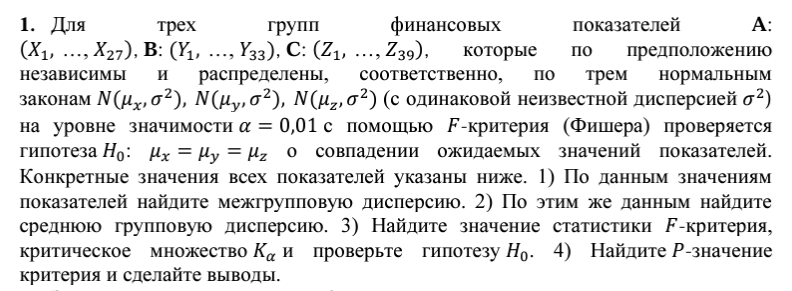

In [3]:
A = '''(0,616; 1,046; 2,575; -0,344; 2,339; -0,68; 3,739; 2,251; -1,252; 3,536; -0,491; 5,556; 4,856; -1,68; 2,33; 1,345; 2,829; 2,539; 3,304; 3,497; 0,211; 3,563; 0,94; 3,642; 1,956; 3,919; 3,568)'''
B = '''(2,834; 1,504; -0,678; 5,619; 0,97; 1,617; 3,768; -1,309; 3,343; -1,778; -0,854; 1,04; 2,83; -2,335; 4,853; 5,6; 4,341; 4,362; 3,52; 1,151; -0,621; -2,88; 1,697; 1,753; 0,211; 2,157; 1,989; 2,457; 1,399; 1,61; -0,558; 2,132; 2,293)'''
C = '''(2,398; -2,77; 4,679; 1,924; 0,574; 5,329; 0,699; 4,457; -0,3; 1,682; -1,34; 0,046; -1,096; 1,935; 2,411; 4,134; 5,643; 3,071; 6,526; 4,941; 2,844; -0,43; -2,066; 0,22; 0,317; -1,923; 1,38; -2,485; 0,111; -0,542; 4,78; 1,93; 0,462; 5,487; -3,547; 2,933; -0,987; -0,21; 3,955)'''

A = np.array(A[1:-1].replace(',','.').split(';')).astype(float)
B = np.array(B[1:-1].replace(',','.').split(';')).astype(float)
C = np.array(C[1:-1].replace(',','.').split(';')).astype(float)

n1,n2,n3 = A.size,B.size,C.size

ni = np.array((n1,n2,n3))
n = ni.sum()
k = 3

alpha = 0.01

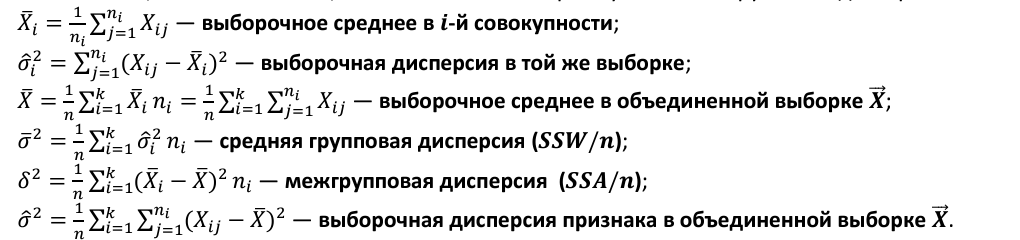

In [4]:
Gr_sr = np.array((A.mean(),B.mean(),C.mean()))
Gr_var = np.array((A.var(),B.var(),C.var()))

all_sr = np.dot(Gr_sr,ni)/n 

sigma2_sr = np.dot(Gr_var,ni)/n #SSW/n
delta2 = np.dot((Gr_sr - all_sr)**2,ni)/n #SSA / n

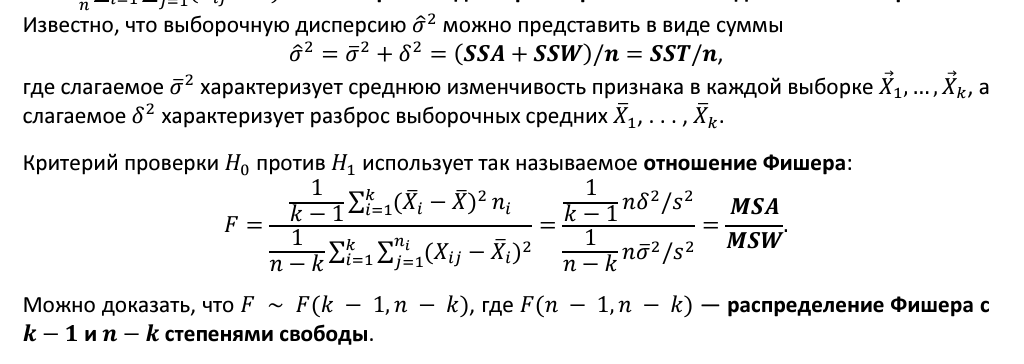

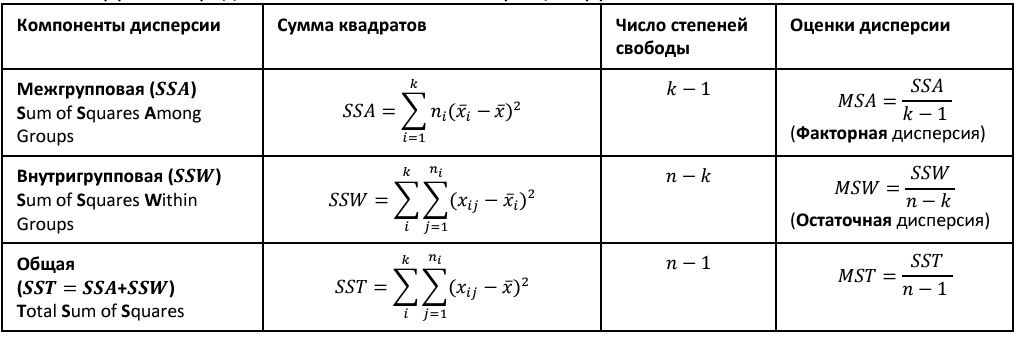

In [5]:
sigma2 =sigma2_sr + delta2

In [6]:
MSA = n * delta2 /(k-1)
MSW = n *sigma2_sr/(n - k)
MST = n * sigma2 / (n-1)

F_obs =  MSA/MSW
F_obs

0.5452397448515371

In [7]:
F_cr = f.ppf(1 - alpha, k-1, n-k)
F_cr

4.833320220106058

In [8]:
if F_obs>F_cr:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))

<IPython.core.display.Math object>

In [9]:
p_val = f.sf(F_obs,k-1,n-k)
p_val

0.5814872318060056

In [10]:
if alpha>p_val:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))

<IPython.core.display.Math object>

In [11]:
# 2 способ

F, p = f_oneway (A,B,C)
F,p

(0.5452397448515373, 0.5814872318060056)

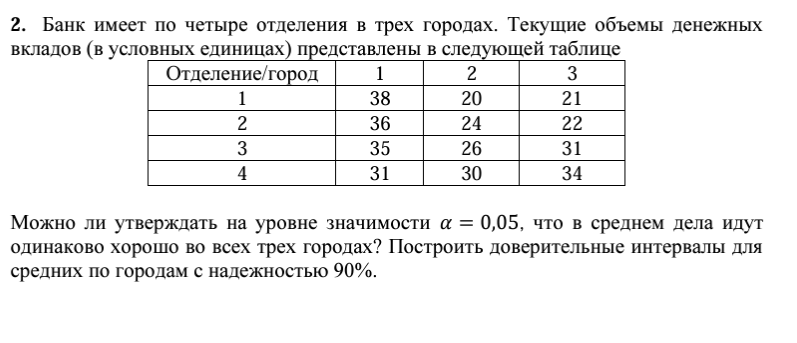

In [12]:
A ='''38
36
35
31'''

B='''20
24
26
30'''

C='''21
22
31
34'''

A = np.array(A.replace(',','.').split('\n')).astype(float)
B = np.array(B.replace(',','.').split('\n')).astype(float)
C = np.array(C.replace(',','.').split('\n')).astype(float)

n1,n2,n3 = A.size,B.size,C.size

ni = np.array((n1,n2,n3))
n = ni.sum()
k = 3

alpha = 0.05
gamma = 0.9

Gr_sr = np.array((A.mean(),B.mean(),C.mean()))
Gr_var = np.array((A.var(),B.var(),C.var()))

all_sr = np.dot(Gr_sr,ni)/n 

sigma2_sr = np.dot(Gr_var,ni)/n #SSW/n
delta2 = np.dot((Gr_sr - all_sr)**2,ni)/n #SSA / n

sigma2 =sigma2_sr + delta2


MSA = n * delta2 /(k-1)
MSW = n *sigma2_sr/(n - k)
MST = n * sigma2 / (n-1)

F_obs =  MSA/MSW

display(Math('F_{observing} ='.replace(' ','~') + rrstr(F_obs,4)  ))

F_cr = f.ppf(1 - alpha, k-1, n-k)

display(Math('F_{critical} ='.replace(' ','~') + rrstr(F_cr,4)  ))


if F_obs>F_cr:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))
    
p_val = f.sf(F_obs,k-1,n-k)

display(Math(f'P-value = {p_val}  '.replace(' ','~')))

if alpha>p_val:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))

t_gamma = t.ppf((1+gamma)/2,n-k)

delt1 = np.subtract(Gr_sr , np.sqrt(MSW/ni)*t_gamma)
delt2 = (Gr_sr + np.sqrt(MSW/ni)*t_gamma)

for i in range(len(np.vstack((delt1,delt2)).T)):
    display(Math((rrstr(np.vstack((delt1,delt2)).T[i][0],4)+r' <  \mu_' +f'{i}  < '+ rrstr(np.vstack((delt1,delt2)).T[i][1],4)).replace(' ','~')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

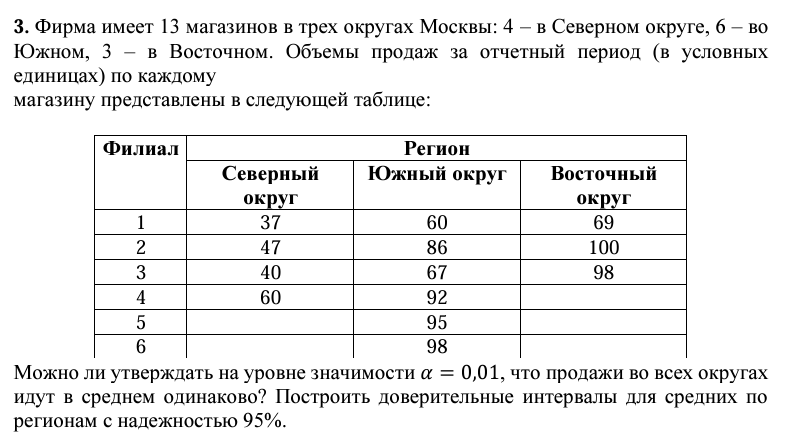

In [14]:
A ='''37
47
40
60'''

B='''60
86
67
92
95
98'''

C='''69
100
98'''


alpha = 0.01
gamma = 0.95

A = np.array(A.replace(',','.').split('\n')).astype(float)
B = np.array(B.replace(',','.').split('\n')).astype(float)
C = np.array(C.replace(',','.').split('\n')).astype(float)

n1,n2,n3 = A.size,B.size,C.size

ni = np.array((n1,n2,n3))
n = ni.sum()
k = 3


Gr_sr = np.array((A.mean(),B.mean(),C.mean()))
display(Math('Выборочное среднее в каждой совокупности ='.replace(' ','~') + latex(v_rrstr(Gr_sr,4))  ))

Gr_var = np.array((A.var(),B.var(),C.var()))
display(Math('Выюорочная дисперсия в каждой совокупности ='.replace(' ','~') + latex(v_rrstr(Gr_var,4))  ))

all_sr = np.dot(Gr_sr,ni)/n
display(Math('Выборочное среднее в объединенной выборке 𝑿  ='.replace(' ','~') + rrstr(all_sr,4)  ))

sigma2_sr = np.dot(Gr_var,ni)/n #SSW/n
display(Math('Средняя групповая дисперсия (𝑺𝑺𝑾/𝒏) ='.replace(' ','~') + rrstr(sigma2_sr,4)  ))


delta2 = np.dot((Gr_sr - all_sr)**2,ni)/n #SSA / n
display(Math('Межгрупповая дисперсия  (𝑺𝑺𝑨/𝒏) ='.replace(' ','~') + rrstr(delta2,4)  ))


sigma2 =sigma2_sr + delta2
display(Math('Выборочная дисперсия признака в объединенной выборке 𝑿 ='.replace(' ','~') + rrstr(sigma2,4)  ))

MSA = n * delta2 /(k-1)
MSW = n *sigma2_sr/(n - k)
MST = n * sigma2 / (n-1)

F_obs =  MSA/MSW
display(Math('F_{observing} ='.replace(' ','~') + rrstr(F_obs,4)  ))

F_cr = f.ppf(1 - alpha, k-1, n-k)
display(Math('F_{critical} ='.replace(' ','~') + rrstr(F_cr,4)  ))


if F_obs>F_cr:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))
    
p_val = f.sf(F_obs,k-1,n-k)
display(Math(f'P-value = {p_val}  '.replace(' ','~')))

if alpha>p_val:
    display(Math("Отвергаем нулевую гипотезу H0 в пользу альтернативной H_1.".replace(' ','~')))
else:
    display(Math("Не хватает оснований отвергнуть нулевую гипотезу H_0.   ".replace(' ','~')))


t_gamma = t.ppf((1+gamma)/2,n-k)

delt1 = np.subtract(Gr_sr , np.sqrt(MSW/ni)*t_gamma)
delt2 = (Gr_sr + np.sqrt(MSW/ni)*t_gamma)

for i in range(len(np.vstack((delt1,delt2)).T)):
    display(Math((rrstr(np.vstack((delt1,delt2)).T[i][0],4)+r' <  \mu_' +f'{i}  < '+ rrstr(np.vstack((delt1,delt2)).T[i][1],4)).replace(' ','~')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
def one_rrstr(x,n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

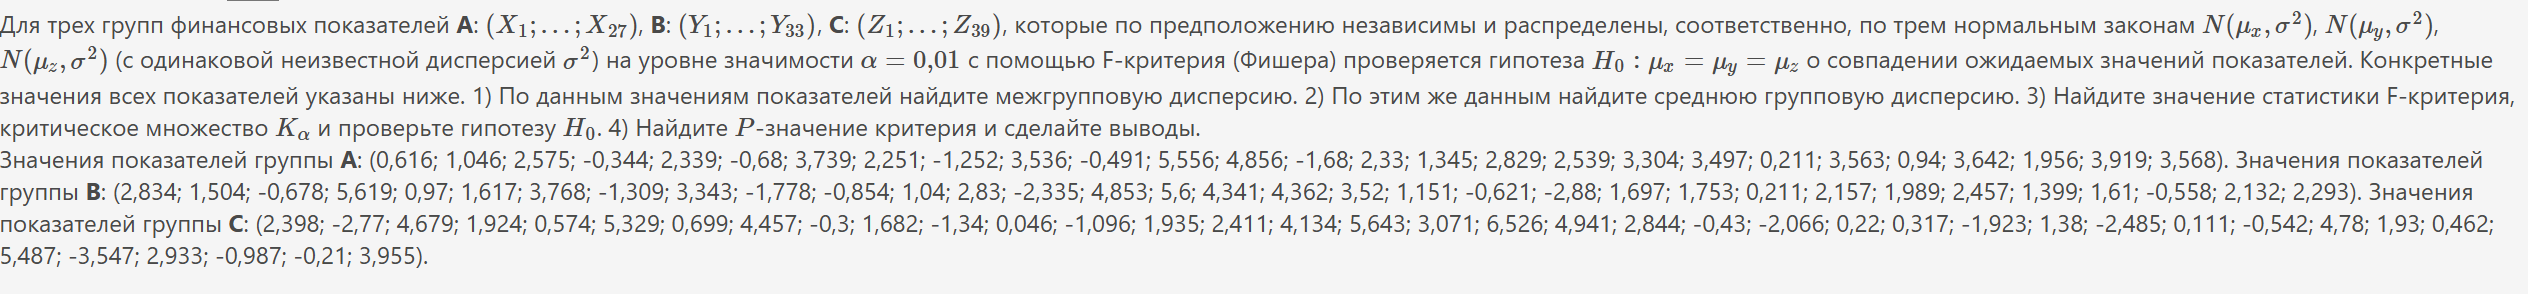

In [38]:
def TSThreeM_1(A,B,C,alpha,splitter = ';',locale = 'rus'):
    """Для трех групп финансовых показателей 
    - A = (X1;...;X_a), 
    - B = (Y1;...;Y_b), 
    - C = (Z1;...;Z_c),
    
    которые по предположению независимы и распределены, соответственно, по трем нормальным законам
    N(μ_x,σ2), N(μ_y,σ2), N(μ_z,σ2) (с одинаковой неизвестной дисперсией σ2)
    на уровне значимости α = `alpha` с помощью F-критерия (Фишера) проверяется гипотеза H0: μ_x = μ_y = μ_z
    о совпадении ожидаемых значений показателей.
    
    Конкретные значения всех показателей указаны ниже.
    - По данным значениям показателей найдите межгрупповую дисперсию. 
    - По этим же данным найдите среднюю групповую дисперсию. 
    - Найдите значение статистики F-критерия, критическое множество K_α и проверьте гипотезу H0. 
    - Найдите P-значение критерия и сделайте выводы.
    
    
    Значения показателей группы A = `A`.
    Значения показателей группы B = `B`.
    Значения показателей группы C = `C`.

    ## Args:
        A (str): Строка перечисления всех чисел, данных как `A`
        B (str): Строка перечисления всех чисел, данных как `B`
        C (str): Строка перечисления всех чисел, данных как `C`
        alpha (numerical): Уровень значимости
        splitter (str, optional): Разделитель между каждым значением в `text_x` и `text_y`. Стандартно равно =  ';'.
        locale (str, optional): Локализция данных - если целая и дробная часть каждого числа из `text разделена не запятой, то нужно изменить значение этого параметра на любое другое. Стандартно равно =  'rus'.

    ## Prints
        `answer` каждое значение последовательно.<br>C запятой вместо точки и сокращенное до соответствующего количества десятичных знаков.

    ## Returns:
        `answer` (tuple): Соответствующие значения
    """
    from scipy.stats import f

    # Взять данные из строки
    if locale== 'rus':
        A = np.array(A.replace(',','.').split(splitter)).astype(float)
        B = np.array(B.replace(',','.').split(splitter)).astype(float)
        C = np.array(C.replace(',','.').split(splitter)).astype(float)
    else:
        A = np.array(A.split(splitter)).astype(float)
        B = np.array(B.split(splitter)).astype(float)
        C = np.array(C.split(splitter)).astype(float)


    n1,n2,n3 = A.size,B.size,C.size

    ni = np.array((n1,n2,n3))
    n = ni.sum()
    k = 3

    Gr_sr = np.array((A.mean(),B.mean(),C.mean()))
    Gr_var = np.array((A.var(),B.var(),C.var()))
    all_sr = np.dot(Gr_sr,ni)/n


    delta2 = np.dot((Gr_sr - all_sr)**2,ni)/n #SSA / n
    print('Межгрупповая дисперсия = ' + one_rrstr(delta2,3)  )

    sigma2_sr = np.dot(Gr_var,ni)/n #SSW/n
    print('Средняя групповая дисперсия = ' + one_rrstr(sigma2_sr,3)  )
    
    
    MSA = n * delta2 /(k-1)
    MSW = n *sigma2_sr/(n - k)
    MST = n * sigma2 / (n-1)

    F_obs =  MSA/MSW
    print('Значение статистики критерия = ' + one_rrstr(F_obs,3)  )

    F_cr = f.ppf(1 - alpha, k-1, n-k)
    p_val = f.sf(F_obs,k-1,n-k)
    print('P-значение критерия = ' + one_rrstr(p_val,3))

    return (delta2,sigma2_sr,F_obs,p_val)

In [39]:
A = '3,956; 0,338; -0,582; 3,536; -0,028; 0,245; 0,807; 1,942; 1,05; -1,4; 0,355; -3,436; 3,401; -1,945; -0,751; 2,025; 0,125; 5,603; -1,203; 2,541; 1,806; -0,903; 3,156; 1,488; 3,752; 3,876; 7,092'
B = '5,108; 1,014; 1,325; 4,539; 3,473; 3,436; -1,981; 1,842; 0,129; 2,572; 1,664; 4,084; 2,661; 3,787; 0,781; -0,367; 0,916; 1,859; 2,81; 7,322; 1,799; -0,394; 1,07; 0,787; 3,056; -1,798; 2,052; 2,276; 2,457; 0,466; 1,329; -1,518; 0,716'
C = '0,597; 2,899; -0,875; 3,775; 5,487; -3,068; 2,923; 3,525; 0,37; 0,947; 1,581; 1,185; 1,158; -2,122; 4,666; 4,491; -0,052; -1,619; 3,151'

alpha = 0.01
splitter = ';'
locale = 'rus'

TSThreeM_1(A,B,C,alpha,splitter = ';',locale = 'rus')

Межгрупповая дисперсия = 0,036
Средняя групповая дисперсия = 4,863
Значение статистики критерия = 0,281
P-значение критерия = 0,756


(0.036009991986418945,
 4.863376020511579,
 0.2813641572670295,
 0.7555361754711916)